Dataset: https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset

<b>Data Set Information:</b>

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

<b>Attribute Information:</b>

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

<b> Importing the Necessary Libraries</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [3]:
b_data=pd.read_csv("hour.csv")
b_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
b_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
b_data.shape

(17379, 17)

<b>Observation:</b>
There are 17379 rows and 17 columns.

For analysis, we are converting dteday into date format.

In [6]:
b_data['dteday']=pd.to_datetime(b_data['dteday'])

<b>Converting the dteday column into int dtype in the format DDMMYYY</b>

In [7]:
b_data['dteday']=b_data['dteday'].apply(lambda x: x.strftime('%d%m%Y'))

In [8]:
b_data['dteday']=b_data.dteday.astype(int)

In [9]:
b_data.dtypes

instant         int64
dteday          int32
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

<b>Observation:</b>
There are 17 attributes, out of which 4 attributes(temp,atemp,hum,windspeed) are of float datatype and 13 attributes are of int datatype. 

<b> Checking Missing Value</b>

In [12]:
b_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null int32
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int32(1), int64(12)
memory usage: 2.2 MB


In [13]:
b_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

<b>Observation:</b>
There is no missing value in the dataset.

<b>Statistical Summary</b>

In [45]:
b_data.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,1.737900e+04,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,1.575080e+07,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,8.789713e+06,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.012011e+06,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,8.072012e+06,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,1.602201e+07,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2.310201e+07,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,3.112201e+07,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


<b> Exploratory Data Analysis</b>

<b>Uni-variate Analysis</b>

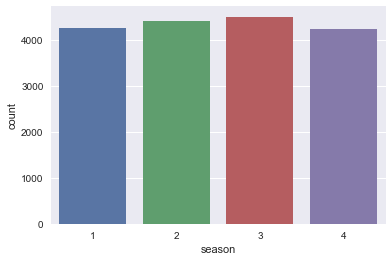

In [17]:
sns.countplot(x="season", data=b_data)

<b>Observation:</b>
season is categorized into 4 categories i.e.springer, summer, fall, winter.  Out of which summer and fall are almost equal.

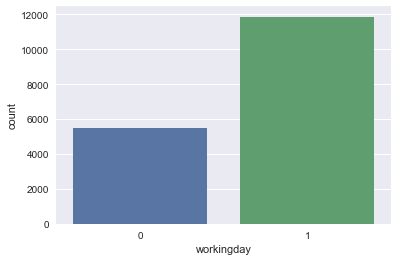

In [19]:
sns.countplot(x="workingday", data=b_data)

<b>Observation:</b>
From the above visualization, we can say that there are more working days.

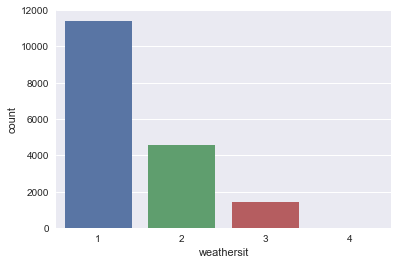

In [20]:
sns.countplot(x="weathersit", data=b_data)

<b>Observation:</b>
weathersit is categorized into 4 categories i.e. Clear, Mist, Light Snow, Heavy Rain.  Out of all, clear weathersit is more.

<b>Bi-Variate Analysis</b>

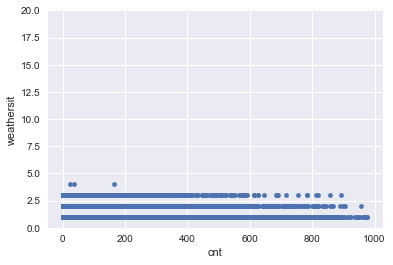

In [24]:
b_data.plot.scatter(x="cnt",y="weathersit",ylim=(0,20));

<b>Observation:</b>
There is two values that are seem to be outlier.

<b>Multi-Variate Analysis</b>

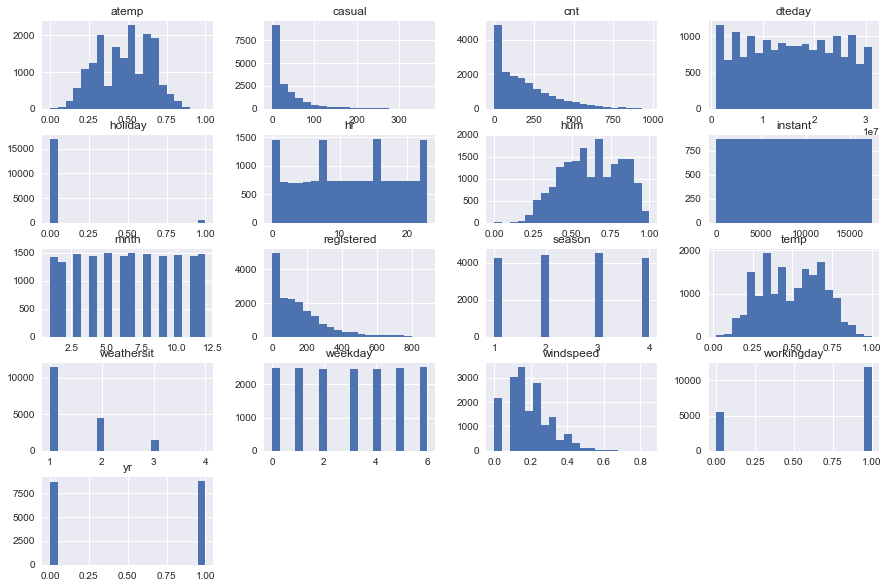

In [46]:
b_data.hist(figsize=(15,10),grid=True,bins=20);

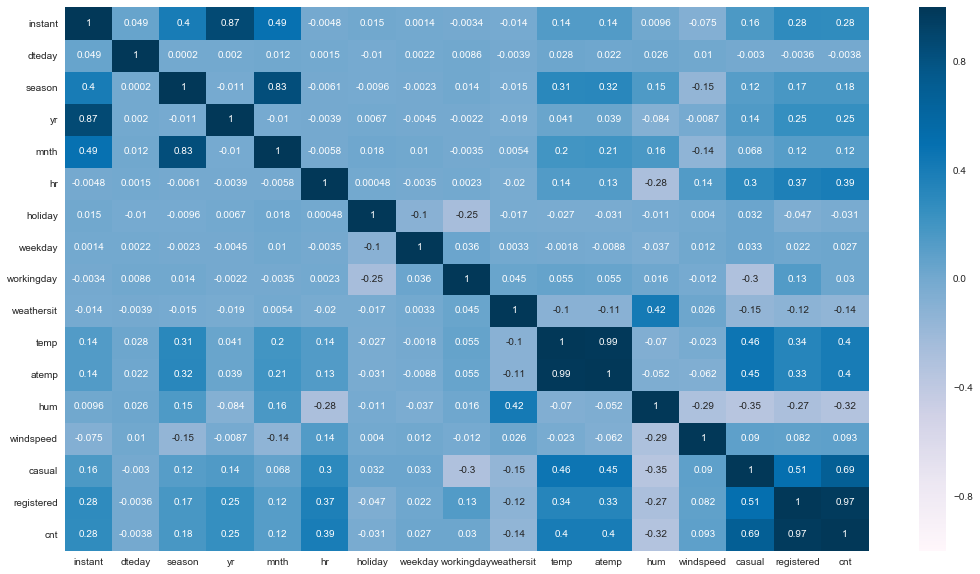

In [47]:
heatmap=b_data.corr()
plt.figure(figsize=(18,10))
sns.heatmap(heatmap, cmap="PuBu",annot=True)

<b>observation:</b>
<li> There is multicollinearity in temp and atemp. To reduce the dimensionality of the predictive model, the feature "atemp" should be removed.</li>
<li> The variables "hr" and "casual" seems to be promising features for the bike sharing count.</li>

In [10]:
import warnings
warnings.filterwarnings("ignore")
b_data.drop(["atemp"],axis=1,inplace=True)

In [11]:
b_data.shape

(17379, 16)

<b>Checking the Skewness</b>

In [12]:
b_data.skew(axis=0)

instant       0.000000
dteday        0.012492
season       -0.005416
yr           -0.010243
mnth         -0.009253
hr           -0.010680
holiday       5.638538
weekday      -0.002998
workingday   -0.785258
weathersit    1.228047
temp         -0.006021
hum          -0.111287
windspeed     0.574905
casual        2.499237
registered    1.557904
cnt           1.277412
dtype: float64

<b>Checking Outliers</b>

In [13]:
from scipy.stats import zscore
z_score=abs(zscore(b_data))
print("The shape of dataset before removing outliers",b_data.shape)
b_data=b_data.loc[(z_score<3).all(axis=1)]
print("The shape of dataset after removing outliers",b_data.shape)

The shape of dataset before removing outliers (17379, 16)
The shape of dataset after removing outliers (15935, 16)


<b>Splitting into input and output variables</b>

In [14]:
X= b_data.drop("cnt",axis=1)
y= b_data[["cnt"]]

<b>Standarization</b>

In [15]:
# Lets bring the dataset features into same scale
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X= scaler.fit_transform(X)

<b>Splitting the dataset into training and testing(70:30)</b>

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.30)

In [17]:
# We are using R2 score to evaluate
from sklearn.metrics import r2_score
def max_r2_score(model,X,y):
    max_r2_score=0
    for r_state in range(42,100):
        X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.30, random_state=r_state)
        model.fit(X_train,y_train)
        y_pred= model.predict(X_test)
        score=r2_score(y_test,y_pred)
        if score>max_r2_score:
            max_r2_score=score
            final_r2_score=r_state
    print("Maximum R2_Score corresponding:",final_r2_score," and it is :",round((max_r2_score),3))

# Machine Learning Models

As target variable is continous, We will implement Linear Regression, Support Vector Regressor, KNN Regressor, Decision tree Regressor, Random Forest Regressor and Gradient Boosting Regressor.

<b>Linear Regression</b>

In [24]:
from sklearn.linear_model import LinearRegression
Lin_r=LinearRegression()
max_r2_score(Lin_r,X,y)

Maximum R2_Score corresponding: 42  and it is : 1.0


In [25]:
pred_linr= Lin_r.predict(X_test)
model1= Lin_r.score(X_test, y_test)
print("The accuracy of the Linear Regression Model is:",round((model1),3))

The accuracy of the Linear Regression Model is: 1.0


In [26]:
# Cross validation score
from sklearn.model_selection import cross_val_score
lr=cross_val_score(Lin_r,X,y,cv=10,scoring="r2").mean()
lr

1.0

In [32]:
from sklearn import metrics
lin_r=np.sqrt(metrics.mean_squared_error(y_test,pred_linr))
lin_r

3.032755621136008e-13

<b>Support Vector Regressor</b>

In [18]:
from sklearn.svm import SVR
sv = SVR(kernel='linear')
max_r2_score(sv,X,y)

Maximum R2_Score corresponding: 83  and it is : 1.0


In [19]:
pred_sv= sv.predict(X_test)
model2=sv.score(X_test, y_test)
print("The accuracy of the Support Vector Regressor Model is:",round((model2),3))

The accuracy of the Support Vector Regressor Model is: 1.0


In [21]:
# Cross validation score
svcv=cross_val_score(sv,X,y,cv=10,scoring="r2").mean()
svcv

0.9999996932253348

In [24]:
sv_r=np.sqrt(metrics.mean_squared_error(y_test,pred_sv))
sv_r

0.06009617031930051

<b>KNN Regressor</b>

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
parameters={"n_neighbors":range(2,30)}
knr= GridSearchCV(knn,parameters,cv=5)
knr.fit(X,y)
knr.best_params_

{'n_neighbors': 7}

In [34]:
knr= KNeighborsRegressor(n_neighbors=7)
max_r2_score(knr,X,y)

Maximum R2_Score corresponding: 92  and it is : 0.948


In [36]:
pred_knr= knr.predict(X_test)
model3= knr.score(X_test, y_test)
print("The accuracy of the KNN Regressor Model is:",round((model3),3))

The accuracy of the KNN Regressor Model is: 0.956


In [37]:
# Cross validation score
kncv=cross_val_score(knr,X,y,cv=10,scoring="r2").mean()
kncv

0.9146823898802277

In [38]:
from sklearn import metrics
knn_r=np.sqrt(metrics.mean_squared_error(y_test,pred_knr))
knn_r

31.187514292900474

<b>Decision Tree Regressor</b>

In [39]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
max_r2_score(dtr,X,y)

Maximum R2_Score corresponding: 73  and it is : 0.999


In [40]:
pred_dtr= dtr.predict(X_test)
model4= dtr.score(X_test, y_test)
print("The accuracy of the Decision Tree Model is:",round((model4),3))

The accuracy of the Decision Tree Model is: 1.0


In [41]:
# Cross validation score
dtcv=cross_val_score(dtr,X,y,cv=10,scoring="r2").mean()
dtcv

0.9992739596141453

In [42]:
from sklearn import metrics
dtr_r=np.sqrt(metrics.mean_squared_error(y_test,pred_dtr))
dtr_r

2.233728259398018

# Evaluation

In [25]:
#Lets initialise the data frame with columns model and f1_score
result= [["Linear Regression", model1, linr_r],["Support Vector Regressor",model2,sv_r],["KNN Regressor",model3,knn_r],["Decision Tree Regressor", model4,dtr_r]]
compare_result= pd.DataFrame(result, columns=["Model Name", "Accuracy","RMSE"], index=[1,2,3,4])
compare_result

,Model Name,Accuracy,RMSE
1,Linear Regression,1.000,3.032755
2,Support Vector Regressor,1.000,0.060096
3,KNN Regressor,0.956,31.187514
4,Decision Tree Regressor,1.000,2.233728


<b>Observation:</b>
<li> As the target variable is numerical, we have calculated R2 Score and evaluated RMSE for the performance of the models.</li>
<li> from the above results, we can see that Support Vector Regressor performed well and has lowest RMSE value(0.060096).</li>

<b>Saving the prediction</b>

As Support Vector Regressor performed well. We are saving prediction of this.

In [26]:
np.savetxt('Model4.csv',pred_sv,delimiter=',')

In [28]:
#Lets save the above model
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(sv, 'project4.pkl')

['project4.pkl']